<a href="https://colab.research.google.com/github/Joshmen06/Logistic-Regression-Project/blob/main/6_Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd

In [175]:
data=pd.read_csv('/content/portu_banking_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [176]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [177]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [179]:
data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [180]:
data.value_counts()

age  job         marital   education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y
47   technician  divorced  high.school          no       yes      no    cellular   jul    thu          43        3         999.0  0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       0    2
45   admin.      married   university.degree    no       no       no    cellular   jul    thu          252       1         999.0  0         nonexistent  -2.9          92.469          -33.6          1.072      5076.2       1    2
41   technician  married   professional.course  no       yes      no    cellular   aug    tue          127       1         999.0  0         nonexistent   1.4          93.444          -36.1          4.966      5228.1       0    2
39   admin.      married   university.degree    no       no       no    cellular   nov   

In [181]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [182]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [183]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [184]:
data_1=data[data['age']=='30-32']
data_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
967,30-32,blue-collar,married,basic.6y,no,no,no,telephone,jun,mon,...,2,999.0,0,nonexistent,1.4,94.465,-41.8,4.96,5228.1,0


In [185]:
pd.to_numeric(data['age'], errors='coerce').convert_dtypes('int64')


0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: Int64

In [186]:
data["age"].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [187]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [188]:
data['age']=data['age'].replace({'18-25':'22','20-40':'30','30-32':'31','25-30':'28','30-40':'35','50-55':'53','45-50':'48','35-40':'38','20-25':'23','30-35':'33','35-30':'33'})
data_1=data.select_dtypes(include='int64')
data_1.head()

,duration,campaign,previous,y
0,210,1,0,0
1,138,1,0,0
2,339,3,2,1
3,185,2,0,0
4,137,1,1,1


In [189]:
data["age"]

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: object

In [190]:
data["age"].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '22', '70', '76', '73',
       '66', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27, 28, 32,
       51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54,
       40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [191]:
data["age"] = data["age"].astype(int)

In [192]:
data['age'].dtype

dtype('int64')

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show>

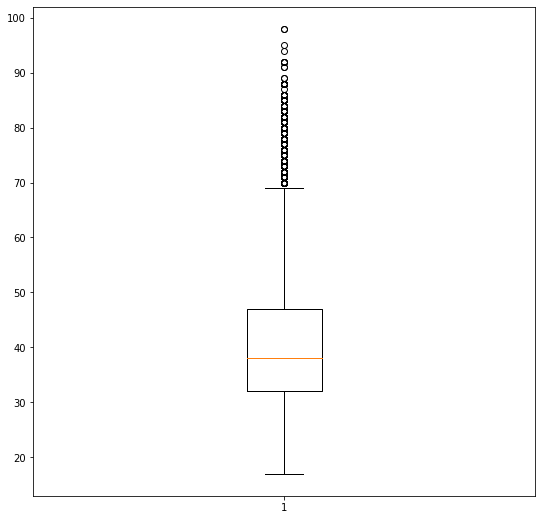

In [194]:
plt.figure(figsize=(9,9))
plt.boxplot(data['age'])
plt.show

In [195]:
data['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [196]:
data['job'] = data['job'].replace({'BLUE-COLLAR':'blue-collar','TECHNICIAN':'technician','MANAGEMENT':'management','RETIRED':'retired','SERVICES':'services','ADMIN.':'admin', 'HOUSEMAID':'housemaid', 'UNEMPLOYED':'unemployed', 'ENTREPRENEUR':'entrepreneur', 'SELF-EMPLOYED':'self-employed', 'UNKNOWN':'unknown', 'STUDENT':'student'})

In [197]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'D', 'unknown', 'S', 'M'],
      dtype=object)

In [198]:
data['marital'] = data['marital'].replace({'D':'divorced','S':'single','M':'married'})

In [199]:
data[data['marital']=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
206,52,services,unknown,professional.course,no,yes,no,telephone,jun,fri,...,2,999.0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
228,30,technician,unknown,university.degree,no,no,no,cellular,oct,fri,...,2,16.0,1,success,-1.1,94.601,-49.5,0.942,4963.6,0
2188,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3284,32,unknown,unknown,university.degree,no,no,no,telephone,jun,thu,...,7,999.0,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
3751,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,...,4,999.0,1,failure,-3.4,92.431,-26.9,0.722,5017.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36975,34,admin.,unknown,university.degree,no,no,no,cellular,may,mon,...,1,999.0,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
38147,66,retired,unknown,basic.9y,no,yes,no,cellular,aug,wed,...,2,999.0,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,0
38897,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,...,2,11.0,2,success,-1.8,93.369,-34.8,0.639,5008.7,1
39237,29,admin.,unknown,professional.course,no,yes,no,cellular,nov,thu,...,1,999.0,1,failure,-0.1,93.200,-42.0,4.076,5195.8,0


In [200]:
data['marital']=data['marital'].replace({'unknown':'married'})

In [201]:
data['campaign'].unique()

array([ 1,  3,  2,  8,  5,  4, 25, 11, 12, 18,  6, 17,  7, 20, 16, 14, 10,
        9, 19, 29, 13, 40, 15, 34, 22, 24, 41, 21, 23, 39, 28, 27, 31, 35,
       26, 30, 32, 43, 33, 42, 56, 37])

In [202]:
data['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [203]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [204]:
data['duration'].unique()

array([ 210,  138,  339, ..., 2260, 1662, 1490])

In [205]:
data['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [206]:
data['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'admin'], dtype=object)

In [207]:
data['job']=data['job'].replace({'admin.':'admin'})

In [208]:
data['education'].mode()

0    university.degree
dtype: object

In [209]:
data[data['education']=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
21,35,blue-collar,single,unknown,no,no,yes,telephone,jun,fri,...,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
26,49,technician,divorced,unknown,no,yes,yes,cellular,oct,thu,...,1,999.0,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,0
69,44,blue-collar,married,unknown,unknown,yes,no,telephone,may,tue,...,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
70,28,unknown,single,unknown,unknown,yes,no,telephone,jun,thu,...,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41005,46,blue-collar,married,unknown,no,yes,no,telephone,jul,fri,...,1,999.0,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
41029,62,technician,married,unknown,no,yes,no,cellular,apr,fri,...,2,999.0,1,failure,-1.8,93.749,-34.6,0.645,5008.7,0
41051,59,admin,married,unknown,no,no,yes,cellular,sep,mon,...,4,999.0,1,failure,-3.4,92.379,-29.8,0.797,5017.5,1
41165,56,admin,married,unknown,no,yes,no,cellular,aug,mon,...,2,999.0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0


In [210]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [211]:
data['education'] = data['education'].replace({'basic.4y':'basic-4y','basic.6y':'basic-6y','basic.9y':'basic-9y','unknown':'university.degree'})

In [212]:
data['education'].unique()

array(['basic-4y', 'university.degree', 'high.school', 'basic-9y',
       'professional.course', 'basic-6y', 'illiterate'], dtype=object)

In [213]:
data.education.value_counts()

university.degree      13899
high.school             9515
basic-9y                6045
professional.course     5243
basic-4y                4176
basic-6y                2292
illiterate                18
Name: education, dtype: int64

In [214]:
data['nr_employed'].unique()

array([5228.1, 5195.8, 4991.6, 5099.1, 5076.2, 5191. , 5017.5, 5008.7,
       4963.6, 5023.5, 5176.3])

In [215]:
data['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [216]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [217]:
data['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [218]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [219]:
data['default']=data['default'].replace({'unknown':'no'})

In [220]:
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [221]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [222]:
data['loan']=data['loan'].replace({'unknown':'no'})

In [223]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [224]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899176,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.300424,257.615483,2.574776,967.871001,0.155990,0.182330,93.596964,-40.272417,3.744447,5171.802531,0.101727
single,33.158195,261.524378,2.533800,952.243603,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041


In [225]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910830,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [226]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin,38.187008,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555327,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360465,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947924,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [227]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic-4y,47.596504,264.827826,2.600575,970.015326,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic-6y,40.447644,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic-9y,39.062035,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079916,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,39.451327,254.365062,2.567595,951.984747,0.196633,-0.017231,93.514034,-39.963602,3.534824,5162.768386,0.138211


In [228]:
data_job=data['poutcome'].groupby(data['job'])
data_job

In [229]:
data_bank=data['y'].groupby(data['job']).mean()
data_bank

job
admin            0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: y, dtype: float64

(array([1.6660e+03, 1.1344e+04, 1.2036e+04, 8.0880e+03, 5.8220e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

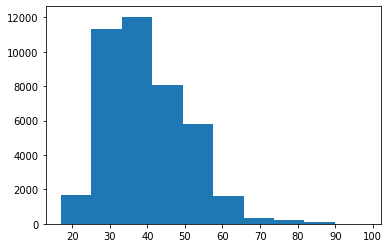

In [230]:
plt.hist(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

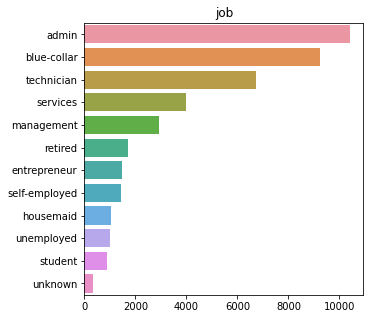

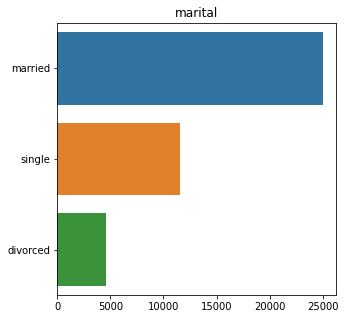

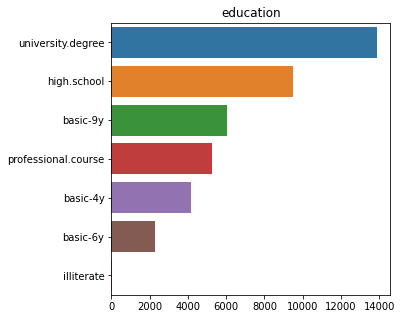

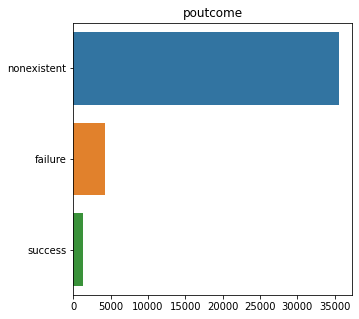

In [231]:
cols = ['job', 'marital','education','poutcome' ]
for col in cols:
  plt.figure(figsize=(5,5))
  sns.barplot(data[col].value_counts().values,data[col].value_counts().index)
  plt.title(col)
plt.show()

In [232]:
obj_cols = data.select_dtypes(include='object')
obj_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic-4y,no,yes,no,cellular,aug,thu,nonexistent
1,technician,married,university.degree,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic-4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,high.school,no,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic-4y,no,no,no,telephone,may,thu,nonexistent
41185,admin,single,university.degree,no,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [233]:
df = data
for col in obj_cols:
  dummies = pd.get_dummies(df[col],drop_first=True)
  df = pd.concat([df,dummies], axis = 'columns')

In [234]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,44,blue-collar,married,basic-4y,no,yes,no,cellular,aug,thu,...,0,0,0,0,0,1,0,0,1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,0,1,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,0,0,0,0,0,0,1,0
4,55,retired,married,basic-4y,no,yes,no,cellular,aug,fri,...,0,0,0,0,0,0,0,0,0,1


In [235]:
obj_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [236]:
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],axis=1, inplace=True)

In [237]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'married', 'single', 'basic-6y', 'basic-9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree', 'yes',
       'unknown', 'yes', 'yes', 'telephone', 'aug', 'dec', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'thu', 'tue', 'wed', 'nonexistent',
       'success'],
      dtype='object')

In [238]:
df['y'] = data['y']

In [239]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [241]:
x=df.drop('y',axis=1)
y=df['y'] 

In [242]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [243]:
model=LogisticRegression(verbose=1)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(verbose=1)

In [244]:
predictions = model.predict(x_test)
print(predictions)
print()
print( classification_report(y_test, predictions) )

[0 0 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7308
           1       0.67      0.40      0.50       930

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



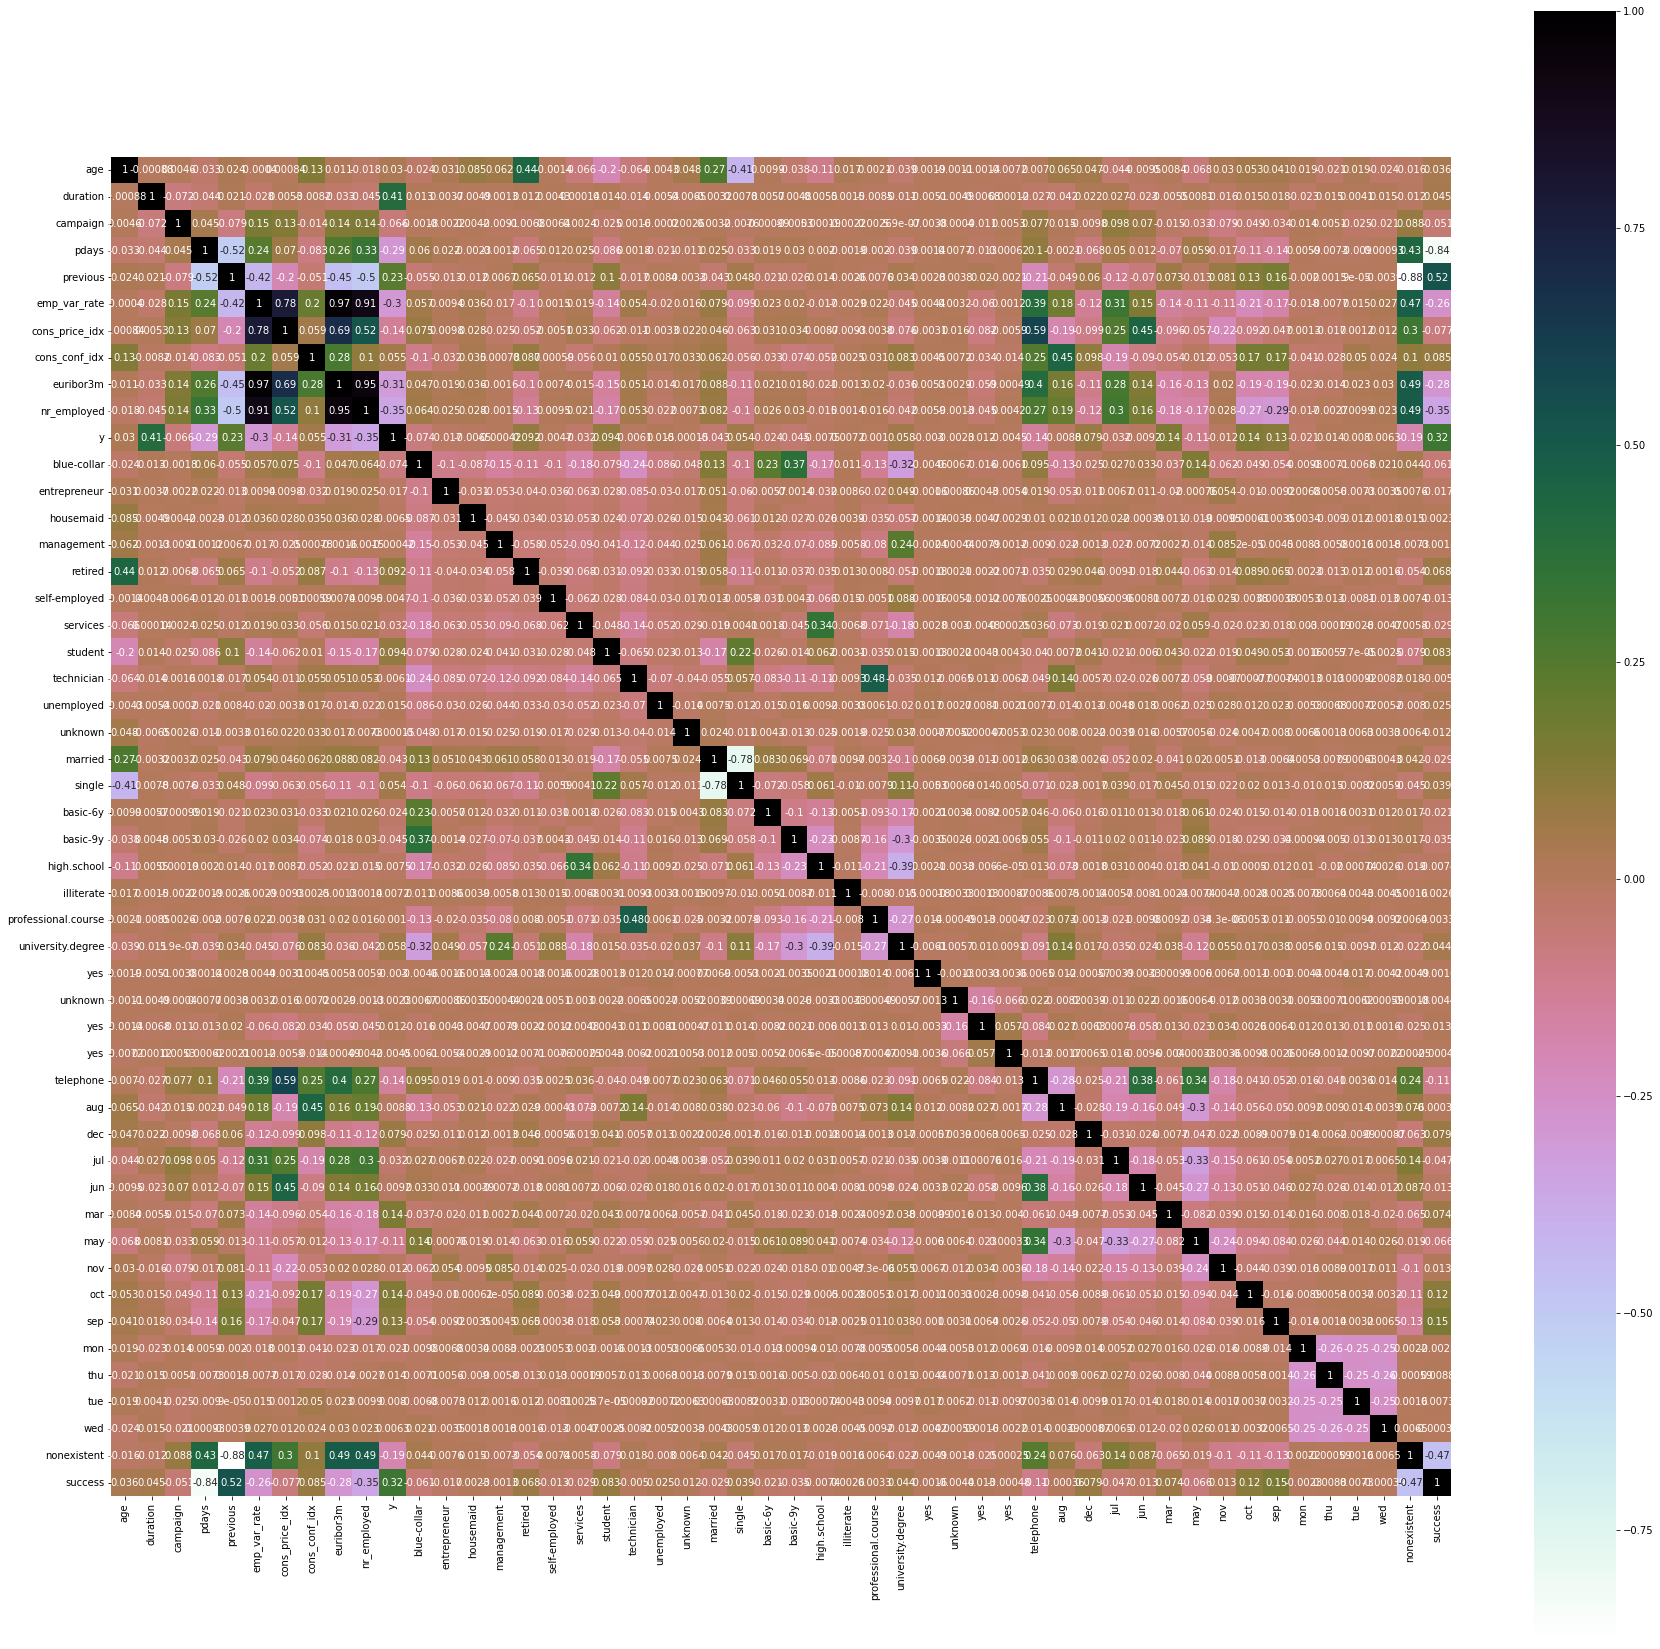

In [245]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

The accuracy of the Model 0.9102937606215101
Confusion matrix, without normalization
[[7129  179]
 [ 560  370]]
Normalized confusion matrix
[[0.97550629 0.02449371]
 [0.60215054 0.39784946]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


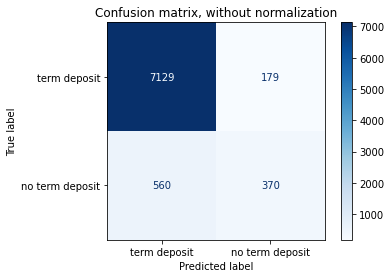

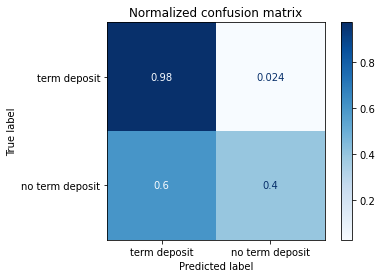

In [246]:
from sklearn.metrics import plot_confusion_matrix

print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_names = ['term deposit','no term deposit']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [247]:
x.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


In [248]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

In [249]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)


In [250]:
x_sm,y_sm = sm.fit_resample(x.values,y)

In [251]:
x_sm.shape

(73096, 49)

In [252]:
y_sm.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [253]:
x_train , x_test,y_train, y_test = train_test_split(x_sm,y_sm, test_size = 0.2)

In [254]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [255]:
pred = model.predict(x_test)

In [256]:
print( classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7232
           1       0.86      0.89      0.87      7388

    accuracy                           0.87     14620
   macro avg       0.87      0.87      0.87     14620
weighted avg       0.87      0.87      0.87     14620



In [257]:
from sklearn import metrics
print("The confusion matrix is")
print(metrics.confusion_matrix(y_test,pred))

The confusion matrix is
[[6177 1055]
 [ 829 6559]]


In [259]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(regressor, n_features_to_select=None)
rfe.fit(x_sm, y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFE(estimator=LogisticRegression())

In [260]:
print(rfe.support_)

[False False  True False  True  True  True  True  True False  True False
 False False  True False  True  True  True False False  True  True False
  True False False False  True False False False False  True  True False
  True False  True  True  True  True False  True False False False False
  True]


In [261]:
print(rfe.ranking_)

[16 14  1 17  1  1  1  1  1  6  1 10 15 21  1 25  1  1  1 13 23  1  1  8
  1  2 24 12  1 26 18  3 11  1  1 22  1  4  1  1  1  1  5  1 19  7 20  9
  1]
